# Reinforcement learning
Reinforcement learning is an area of machine learning concerned with how software agents ought to take actions in an environment so as to maximize some notion of cumulative reward

It is about taking suitable action to maximize reward in a particular situation. It is employed by various software and machines to find the best possible behavior or path it should take in a specific situation. Reinforcement learning differs from the supervised learning in a way that in supervised learning the training data has the answer key with it so the model is trained with the correct answer itself whereas in reinforcement learning, there is no answer but the reinforcement agent decides what to do to perform the given task. In the absence of training dataset, it is bound to learn from its experience.

# Problem Statement

We are going to try optimizing the click-through rate of different users on an ad that we put on a social network.The department of marketing prepared some different versions of this same ad in different sceneries.So,they prepared different versions of the same ad that they would put on the social network but,the problem is that they're actually not very sure of which ad to put on the social network they want to put the ad that will get the maximum clicks. <br>
So, we need to help them in finding the ad that will lead to the best conversion rate.<br>
We are going to solve this problem with the two most popular algorithms for this.These are the **upper confidence bound** and **Bayesian inference**.

# Dataset

This is just the data set for simulation. We have CRT simulation with those users when they select then value of 1 is given else 0 is given

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Random Selection
We shall apply Random Selection method to get a guessed idea of our outcomes.

In [3]:
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

In [4]:
total_reward

1240

### Visualising the results

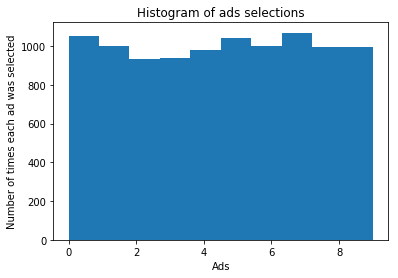

In [5]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

**This result shows that ad 1 might have best outcome. Though 9 is also pretty same and it is very close decision to determine.**

## Implementing UCB

In [6]:
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_reward = [0] * d
total_reward = 0

In [7]:
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_reward[i] / numbers_of_selections[i]
            delta_i  = math.sqrt(3/2 * math.log(n+1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400

        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i

    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_reward[ad] += reward
    total_reward += reward

In [8]:
total_reward

2178

**There is double improvement is total reward comparing to random selection. We had 1251 and now we have 2178 i.e almost double,**  

### Visualising the results

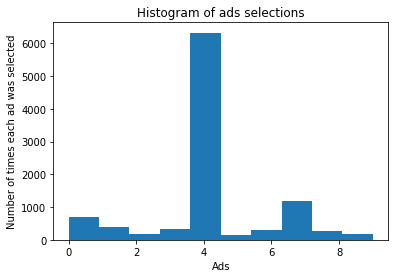

In [9]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

So ,we have our 5th ad(as index starts from 0) sample which has highest CRT. This seems to be solving our problem. Let's see how Bayesian method would go !

## Bayesian inference

In [10]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [11]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

In [12]:
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(
            numbers_of_rewards_1[i] + 1,
            numbers_of_rewards_0[i] + 1
        )
        if random_beta > max_random:
            max_random = random_beta
            ad = i

    ads_selected.append(ad)
    reward = dataset.values[n, ad]

    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    elif reward == 0:
        numbers_of_rewards_0[ad] += 1

    total_reward += reward

In [13]:
total_reward

2595

**Clearly, we have best total reward so far. But, as this is coming from random selection so, we need to run code couple of times to see if it performs better.**

total_reward

In [18]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

In [19]:
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(
            numbers_of_rewards_1[i] + 1,
            numbers_of_rewards_0[i] + 1
        )
        if random_beta > max_random:
            max_random = random_beta
            ad = i

    ads_selected.append(ad)
    reward = dataset.values[n, ad]

    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    elif reward == 0:
        numbers_of_rewards_0[ad] += 1

    total_reward += reward

In [16]:
total_reward

2584

In [20]:
total_reward

2617

**As result remain consistent so, we can conclude that results from bayesian inference is better than UCB.**

### Visualising the results

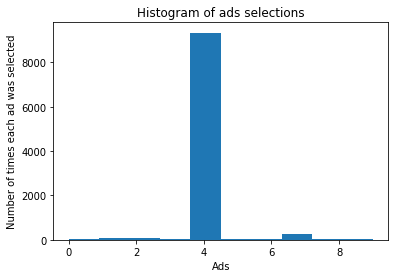

In [21]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

our ad selection result with both UCB and Bayesian method remains same i.e 5th ad sample.